In [311]:
#importing Core-Libraries & Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#importing pre-processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importing machine learning libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#performance metrics libraries
from sklearn.metrics import  classification_report
from sklearn.metrics import roc_curve, roc_auc_score


*All libraries imported successfully*

In [312]:
#importing & reading dataset

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


*Only first 5 rows of the dataset displayed*

In [313]:
#checking missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


*There is no missing values out of 918 rows in the dataset*

In [314]:
#checking data description

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**There is data irregularities**.
It is not possible for a living being to have:
*0 RestingBP*,
*0 Cholesterol*,
*0 FastingBS*

***Therefore, we need to perform EDA to understand the data in a better sense.***

**EXPLORATORY DATA ANALYSIS**

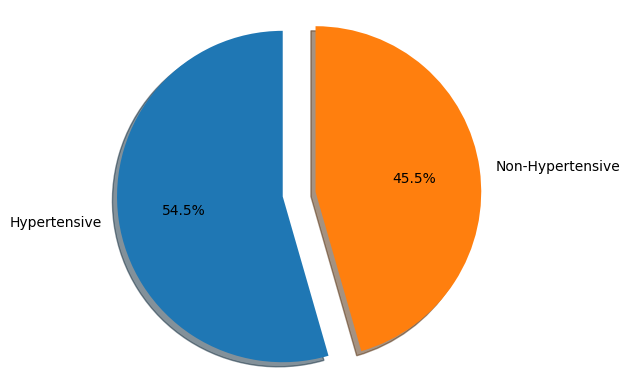

In [315]:
#percentage of heart disease

heart_counts = data['output'].value_counts()
labels = 'Hypertensive', 'Non-Hypertensive'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(heart_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Morethan 54% of the patients in the dataset are heart disease (hypertensive)

In [316]:
#Checking the Distribution of Age

age_his = px.histogram(data, x='age', marginal='box', color_discrete_sequence=['#C147E9'])
age_his.update_layout(title='Age Distribution')
age_his.show()

Distribution of Ages shown that most of the patient are between 50 - 68 Years of age.

In [317]:
#distribution of Age as per heart disease

cls = 'output'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

age_hds = px.histogram(data, x='age', color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
age_hds.show()

This is suggesting that the higher the ages of the patients, the higher the chances of having heart disease

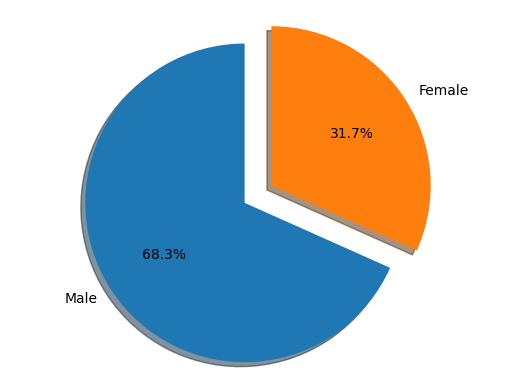

In [318]:
#distrubtion of sex

sex_counts = data['sex'].value_counts()
labels = 'Male', 'Female'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(sex_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

About of 70% of the patients are male.

In [319]:
#sex distribution on heart disease

x='sex'
cdm = {0:'#C147E9',1:'#F06292'}
clr='output'

bar_sex_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
bar_sex_hd.show()

The output suggested that Male are more likely to have Heart Disease than Female

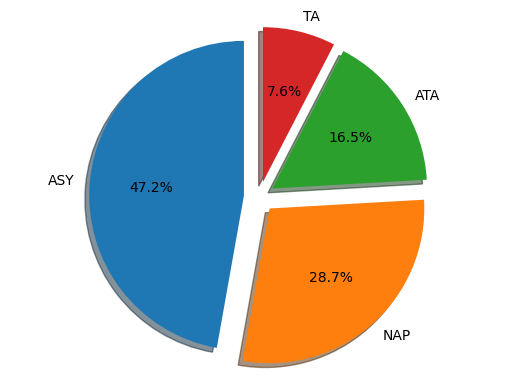

In [320]:
#percentage distrubtion of chest pain

chest_counts = data['cp'].value_counts()
labels = 'ASY', 'NAP', 'ATA', 'TA'
explode = (0.1,0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(chest_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Most of the patients are Asymptomatic with highest scores of 47.2%.

In [321]:
#chest pain type distribution on heart disease

x='cp'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}
labels = 'ASY', 'NAP', 'ATA', 'TA'
bar_chest_hd = px.histogram(data, x=x,color=clr, labels=labels, barmode='group', color_discrete_map=cdm)
bar_chest_hd.show()

This is indicating that majority of heart diseased patients are asymptomatic and having chest pain may not necessarily results to a heart disease or may not be due to a heart disease.

In [322]:
#Checking the Distribution of resting Blood Pressure

rbp_his = px.histogram(data, x='trtbps', marginal='box', color_discrete_sequence=['#C147E9'])
rbp_his.update_layout(title='Resting Blood Pressure')
rbp_his.show()

Majority of the patients have a Resting Blood Pressure between 110 - 150

In [323]:
#distribution of RestingBP as per heart disease

cls = 'output'
x = 'trtbps'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

rbp_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
rbp_hds.show()

The distribution shown that patient with higher restingBP have more chances of heart disease.

In [324]:
#Checking the Distribution of Cholesterol

cls_his = px.histogram(data, x='chol', marginal='box', color_discrete_sequence=['#C147E9'] )
cls_his.update_layout(title='Cholesterol')
cls_his.show()

A number of patients have considerable high colesterol. There is huge outlier to the left in this distribtion

In [325]:
#distribution of Cholesterol as per heart disease

cls = 'output'
x = 'chol'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

cls_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
cls_hds.show()

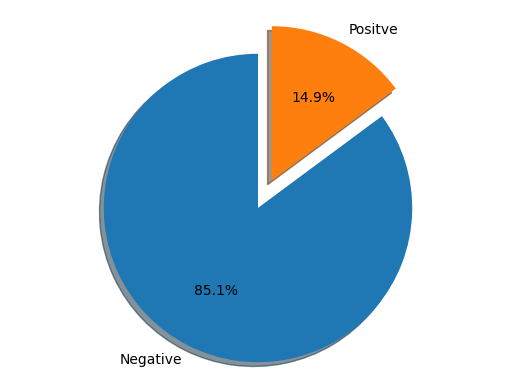

In [326]:
#percentage distrubtion of fasting blood sugar

fbs_counts = data['fbs'].value_counts()
labels = 'Negative', 'Positve'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Only 14% of the patients have Fasting Blood Sugar

In [327]:
#Fasting Blood Sugar type distribution on heart disease

x='fbs'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Patients with Fasting Blood Sugar have a high chances of heart disease

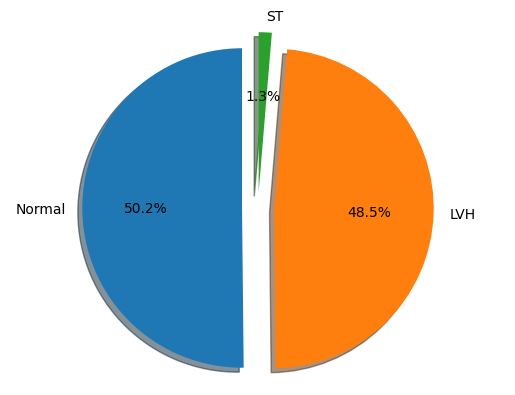

In [328]:
#percentage distrubtion of Resting ECG

fbs_counts = data['restecg'].value_counts()
labels = 'Normal', 'LVH', 'ST'
explode = (0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [329]:
#RestingECG Sugar type distribution on heart disease

x='restecg'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Have no clear information from this distribution.

In [330]:
#Checking the Distribution of MaxHR

mhr_his = px.histogram(data, x='thalachh', marginal='box', color_discrete_sequence=['#C147E9'] )
mhr_his.update_layout(title='Max HR')
mhr_his.show()

In [331]:
#distribution of MaxHR as per heart disease

cls = 'output'
x = 'thalachh'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

mhr_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
mhr_hds.show()

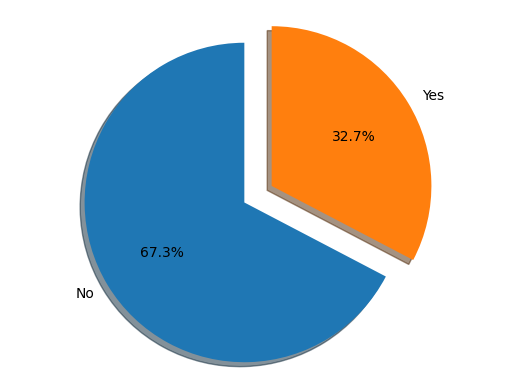

In [332]:
#percentage distrubtion of Exercise Agina

exg_counts = data['exng'].value_counts()
labels = 'No', 'Yes'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(exg_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [333]:
#ExerciseAngina type distribution on heart disease

x='exng'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}

exg_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
exg_chest_hd.show()

Patients with Angina are more likely to have heart disease, than those without.

In [334]:
#Checking the Distribution of Oldpeak

olp_his = px.histogram(data, x='oldpeak', marginal='box', color_discrete_sequence=['#C147E9'] )
olp_his.update_layout(title='Oldpeak')
olp_his.show()

Not normally distributed

In [335]:
#distribution of MaxHR as per heart disease

cls = 'output'
x = 'oldpeak'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

olp_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
olp_hds.show()

Patients with oldPeak of 1.0 and above, have higher chances of heart disease

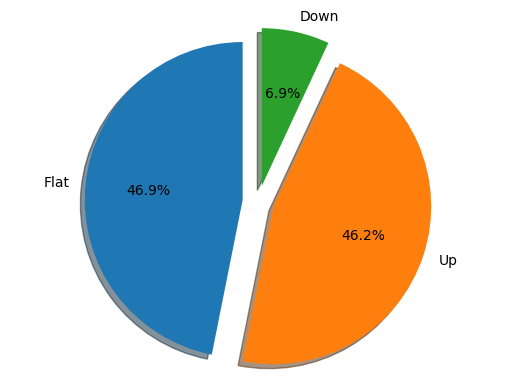

In [336]:
#percentage distrubtion of ST_Slope

sts_counts = data['slp'].value_counts()
labels = 'Flat', 'Up', 'Down'
explode = (0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(sts_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [337]:
#ST_Slope type distribution on heart disease

x='slp'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}

sts_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
sts_hd.show()

Patient with flat and down-slopping are more likely to have heart disease than patient with up-slopping

In [338]:
#Checking the Distribution of Coronary artery anomaly

caa_his = px.histogram(data, x='caa', marginal='box', color_discrete_sequence=['#C147E9'] )
caa_his.update_layout(title='Ca')
caa_his.show()

In [339]:
#distribution of Coronary artery anomaly as per heart disease

cls = 'output'
x = 'caa'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

caa_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
caa_hds.show()

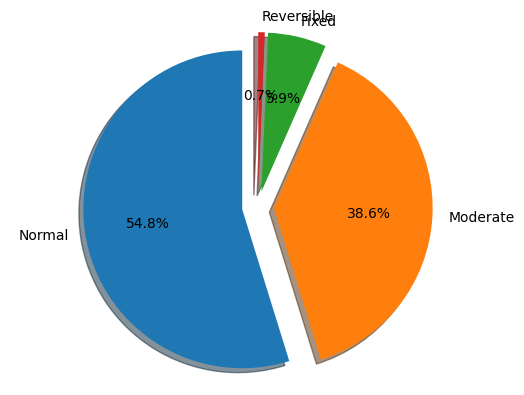

In [340]:
#percentage distrubtion of Thallium heart scan

thal_counts = data['thall'].value_counts()
labels = 'Normal', 'Moderate', 'Fixed', 'Reversible'
explode = (0.1,0.1,0.1, 0.1)

ax = plt.subplot()
ax.pie(thal_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [341]:
#Thallium heart scan type distribution on heart disease

x='thall'
clr='output'
cdm = {0:'#C147E9',1:'#F06292'}

sts_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
sts_hd.show()

In [342]:
#declaring dependent and indepndent variables

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [343]:
#preprocessing with standardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [344]:
#splitting data into training and testing sets

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Machine Learning**

In [345]:
#training with K-Nearest Nieghboors
kn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn_classifier.fit(X_train,y_train)

#training with Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#training with Naive Bayes
nb_classifier=GaussianNB()
nb_classifier.fit(X_train, y_train)

#Logistic Regression
ls_classifier = LogisticRegression()
ls_classifier.fit(X_train, y_train)

#Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

**PERFORMANCE EVALUATION**

In [346]:
#Predictions Performance Scores

kn_score = kn_classifier.score(X_test, y_test)
dt_score = dt_classifier.score(X_test, y_test)
nb_score = nb_classifier.score(X_test, y_test)
ls_score = ls_classifier.score(X_test, y_test)
rf_score = rf_classifier.score(X_test, y_test)
print('---------Prediction Scores------')

print('K-Nearest Classifier Prediction Score is', kn_score*100,'%')
print('Decision Tree Classifier Prediction Score is', dt_score*100,'%')
print('Naive Bayes Prediction Score is', nb_score*100,'%')
print('Logistic Regression Prediction Score is', ls_score*100,'%')
print('Random Forest Prediction Score is', rf_score*100,'%')

---------Prediction Scores------
K-Nearest Classifier Prediction Score is 91.80327868852459 %
Decision Tree Classifier Prediction Score is 80.32786885245902 %
Naive Bayes Prediction Score is 86.88524590163934 %
Logistic Regression Prediction Score is 85.24590163934425 %
Random Forest Prediction Score is 81.9672131147541 %


*All the algorithms have a very good performance of above 80% but K-Nearest has outperformed the rest.*

In [347]:
#determining the precision,recall and f1-score
ykn = kn_classifier.predict(X_test)
ydt = dt_classifier.predict(X_test)
ynb = nb_classifier.predict(X_test)
yls = ls_classifier.predict(X_test)
yrf = rf_classifier.predict(X_test)


KN_report=classification_report(y_test,ykn)
DT_report=classification_report(y_test, ydt)
NB_report=classification_report(y_test,ynb)
LS_report=classification_report(y_test,yls)
RF_report=classification_report(y_test,yrf)

In [348]:
print('K-Nearest Classifier Report:')
print(KN_report)

K-Nearest Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [349]:
print('Decision Tree Classifier Report:')
print(DT_report)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [350]:
print('Naive Bayes Classifier Report:')
print(NB_report)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [351]:
print('Logistic Regression Classifier Report:')
print(LS_report)

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [352]:
print('Random Forest Classifier Report:')
print(RF_report)

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [353]:
#ROC Curve
kn_score = kn_classifier.predict_proba(X_test)[:,1]
dt_score = dt_classifier.predict_proba(X_test)[:,1]
nb_score = nb_classifier.predict_proba(X_test)[:,1]
ls_score = ls_classifier.predict_proba(X_test)[:,1]
rf_score = rf_classifier.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, kn_score)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, dt_score)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, nb_score)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, ls_score)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, rf_score)

print('roc_auc_score for K-Nearest Neighbors: ', roc_auc_score(y_test, kn_score))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, dt_score))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, nb_score))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, nb_score))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, nb_score))

roc_auc_score for K-Nearest Neighbors:  0.9175646551724138
roc_auc_score for DecisionTree:  0.8076508620689655
roc_auc_score for Naive Bayes:  0.894396551724138
roc_auc_score for Logistic Regression:  0.894396551724138
roc_auc_score for Random Forest:  0.894396551724138


KNN and NB have similar ROC Score.

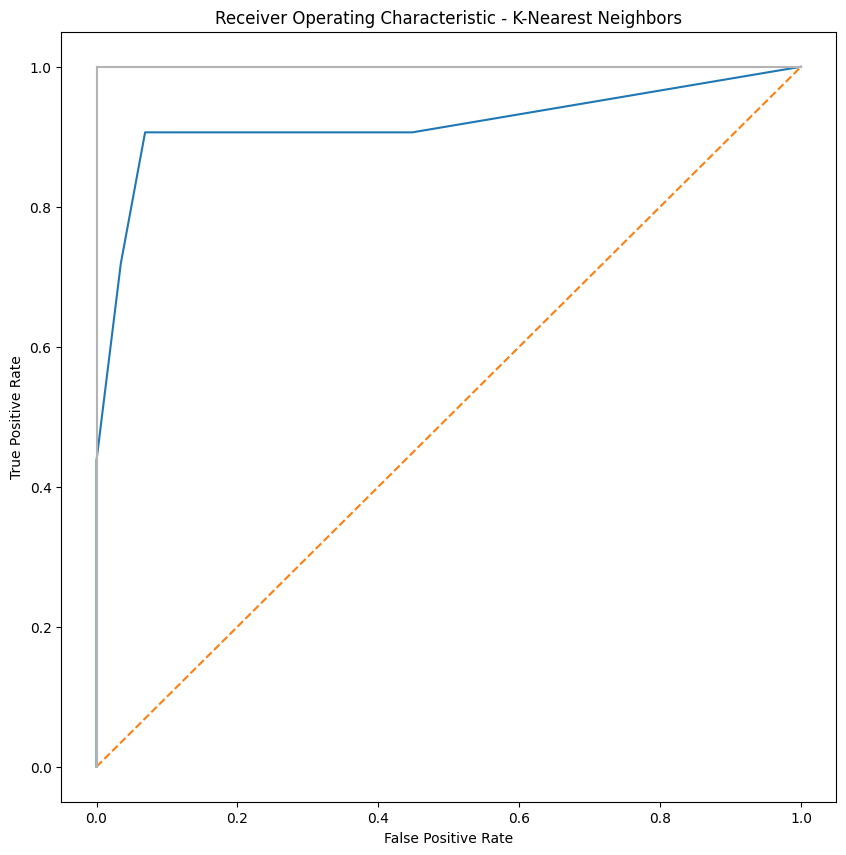

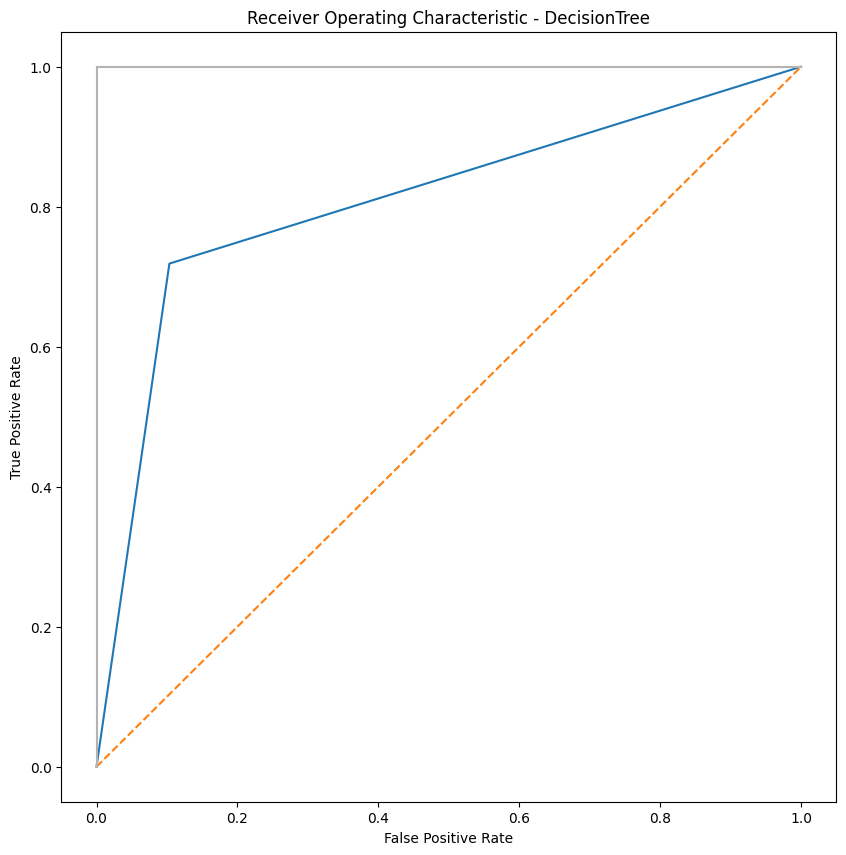

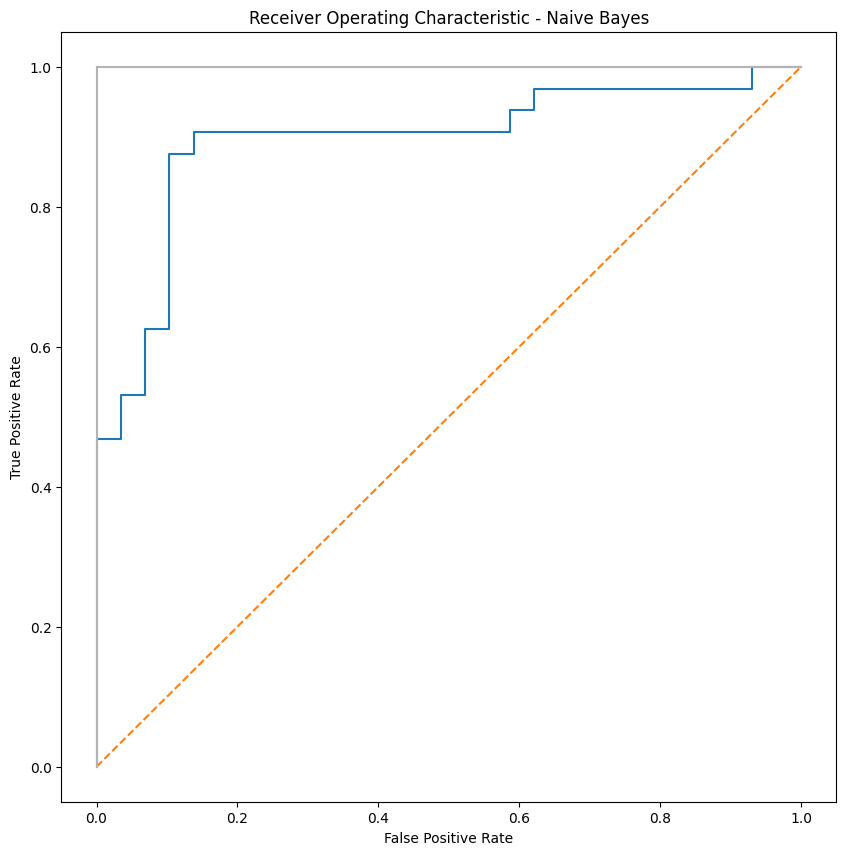

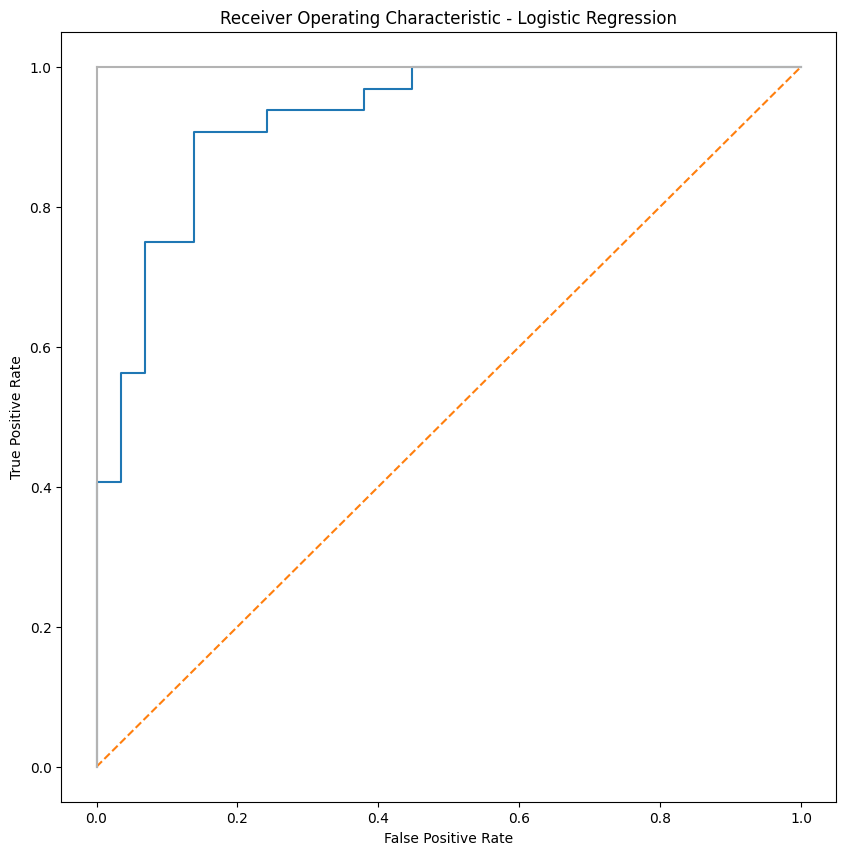

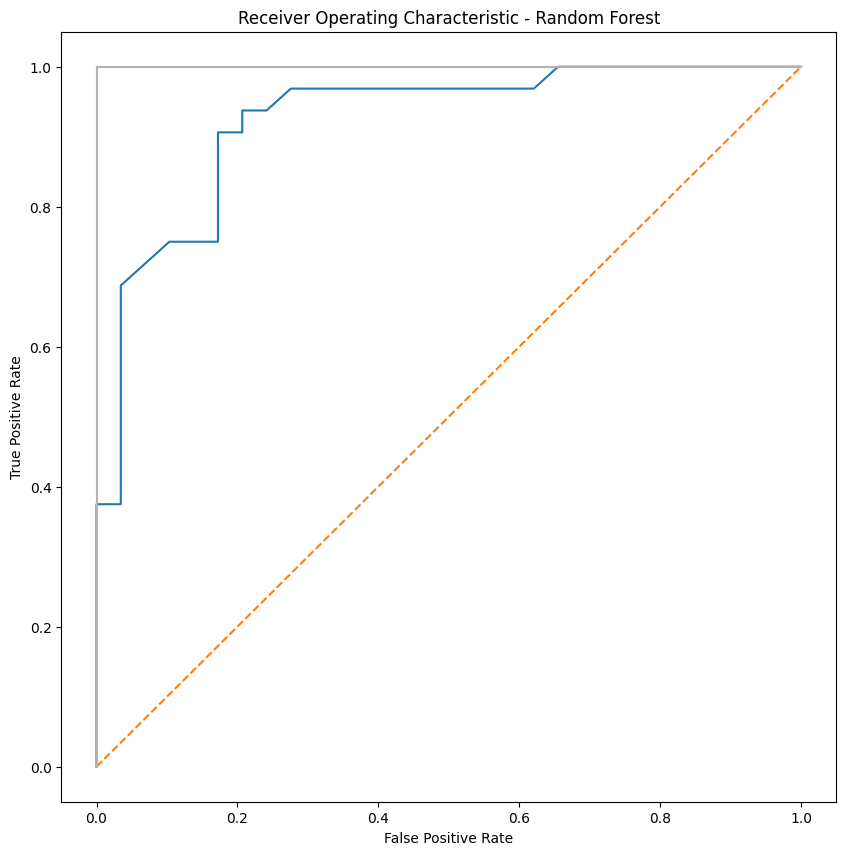

In [354]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All the algorithms have a very strong positive rates. Though KNN has outperformed the rest.